In [1]:
pip install psycopg2

  Using cached psycopg2-2.9.9.tar.gz (384 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [38 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-39
      creating build/lib.linux-x86_64-cpython-39/psycopg2
      copying lib/extras.py -> build/lib.linux-x86_64-cpython-39/psycopg2
      copying lib/extensions.py -> build/lib.linux-x86_64-cpython-39/psycopg2
      copying lib/_range.py -> build/lib.linux-x86_64-cpython-39/psycopg2
      copying lib/pool.py -> build/lib.linux-x86_64-cpython-39/psycopg2
      copying lib/_ipaddress.py -> build/lib.linux-x86_64-cpython-39/psycopg2
      copying lib/errors.py -> build/lib.linux-x86_64-cpython-39/psycopg2
      copying lib/__init__.py -> build/lib.linux-x86_64-cpython-39/psycopg2
      copying lib/tz.py -> build/lib.linux-x86_

In [2]:
pip install configparser


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import psycopg2
from psycopg2 import sql
import configparser

In [5]:
config = configparser.ConfigParser()
config.read('db_config.ini')

PGEND_POINT = config['database']['PGEND_POINT']
PGUSER_NAME = config['database']['PGUSER_NAME']
PGPASSWORD = config['database']['PGPASSWORD']
PGDATABASE_NAME = config['database']['PGDATABASE_NAME']

# Setting up the Connection

In [6]:
def connect():

    # Set up a connection to the postgres server.
    conn_string = "host="+ PGEND_POINT +" port="+ "5432" +" dbname="+ PGDATABASE_NAME +" user=" + PGUSER_NAME \
                  +" password="+ PGPASSWORD

    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()

    return conn, cursor


In [7]:
conn, cursor = connect()

Connected!


# Reading the RUL Table

In [8]:
rul_query = sql.SQL("SELECT * FROM rultable;")

# Execute the query
cur = conn.cursor()
cur.execute(rul_query)

# Fetch all rows
rul_data = cur.fetchall()

# Fetch column names from the cursor description
column_names = [desc[0] for desc in cur.description]

# Create a DataFrame with the fetched data and column names
rul_data = pd.DataFrame(rul_data, columns=column_names)

In [9]:
# Display the DataFrame
rul_data = rul_data.drop('index', axis=1)

In [10]:
print(type(rul_data))

<class 'pandas.core.frame.DataFrame'>


# Reading the Turbo Table

In [11]:
turbo_query = sql.SQL("SELECT * FROM turbotable;")

# Execute the query
cur = conn.cursor()
cur.execute(turbo_query)

# Fetch all rows
turbo_data = cur.fetchall()

# Fetch column names from the cursor description
column_names = [desc[0] for desc in cur.description]

# Create a DataFrame with the fetched data and column names
turbo = pd.DataFrame(turbo_data, columns=column_names)

In [12]:
print(type(turbo))

<class 'pandas.core.frame.DataFrame'>


In [13]:
turbo.head()

,index,engine,cycles,altitude (alt),mach_no (mach),throttle_angle (TRA),fan_inlet_temp (T2),LPC_outlet_temp (T24),HPC_outlet_temp (T30),LPT_outlet_temp (T50),...,corrected_fan_speed (NRf),corrected_core_speed (NRc),bypass_ratio (BPR),burner_fuel_air_ratio (farB),bleed_enthalpy (htBleed),demanded_fan_speed (Nf_dmd),demanded_corrected_fan_speed (PCNfR_dmd),HPT_coolant_bleed (W31),LPT_coolant_bleed (W32),source
0,1,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,0
1,5,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,0
2,6,1,6,25.0045,0.6205,60.0,462.54,537.02,1266.38,1048.72,...,2028.01,7868.87,10.8912,0.02,306,1915,84.93,14.28,8.5590,0
3,8,1,8,20.0020,0.7002,100.0,491.19,607.44,1481.69,1252.36,...,2387.99,8049.26,9.2369,0.02,365,2324,100.00,24.33,14.7989,0
4,13,1,13,20.0003,0.7000,100.0,491.19,607.67,1488.74,1256.10,...,2388.04,8048.52,9.1968,0.02,365,2324,100.00,24.40,14.7202,0


In [16]:
turbo.shape

(87750, 28)

In [17]:
# Split the dataset based on the value of the source column
train_data = turbo[turbo['source'] == 0]
test_data = turbo[turbo['source'] == 1]

In [18]:
print(type(train_data))
print(type(test_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [19]:
train_data.head()

,index,engine,cycles,altitude (alt),mach_no (mach),throttle_angle (TRA),fan_inlet_temp (T2),LPC_outlet_temp (T24),HPC_outlet_temp (T30),LPT_outlet_temp (T50),...,corrected_fan_speed (NRf),corrected_core_speed (NRc),bypass_ratio (BPR),burner_fuel_air_ratio (farB),bleed_enthalpy (htBleed),demanded_fan_speed (Nf_dmd),demanded_corrected_fan_speed (PCNfR_dmd),HPT_coolant_bleed (W31),LPT_coolant_bleed (W32),source
0,1,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,0
1,5,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,0
2,6,1,6,25.0045,0.6205,60.0,462.54,537.02,1266.38,1048.72,...,2028.01,7868.87,10.8912,0.02,306,1915,84.93,14.28,8.5590,0
3,8,1,8,20.0020,0.7002,100.0,491.19,607.44,1481.69,1252.36,...,2387.99,8049.26,9.2369,0.02,365,2324,100.00,24.33,14.7989,0
4,13,1,13,20.0003,0.7000,100.0,491.19,607.67,1488.74,1256.10,...,2388.04,8048.52,9.1968,0.02,365,2324,100.00,24.40,14.7202,0


In [21]:
train_data.shape

(53759, 28)

In [22]:
test_data.head()

,index,engine,cycles,altitude (alt),mach_no (mach),throttle_angle (TRA),fan_inlet_temp (T2),LPC_outlet_temp (T24),HPC_outlet_temp (T30),LPT_outlet_temp (T50),...,corrected_fan_speed (NRf),corrected_core_speed (NRc),bypass_ratio (BPR),burner_fuel_air_ratio (farB),bleed_enthalpy (htBleed),demanded_fan_speed (Nf_dmd),demanded_corrected_fan_speed (PCNfR_dmd),HPT_coolant_bleed (W31),LPT_coolant_bleed (W32),source
53758,53763,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,...,2387.72,8066.90,9.3961,0.02,332,2212,100.0,10.35,6.4181,1
53760,53760,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,...,2388.18,8114.10,8.6476,0.03,369,2319,100.0,28.42,17.1551,1
53761,53761,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,...,2388.12,8053.06,9.2405,0.02,364,2324,100.0,24.29,14.8039,1
53762,53762,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,...,2387.75,8053.04,9.3472,0.02,333,2223,100.0,14.98,8.9125,1
53763,53769,1,10,20.0001,0.7000,100.0,491.19,607.33,1483.66,1261.66,...,2388.03,8045.67,9.2522,0.02,365,2324,100.0,24.47,14.6186,1


In [23]:
test_data.shape

(33991, 28)

In [25]:
train_data = train_data.drop(['index', 'source'], axis=1)

In [26]:
test_data = test_data.drop(['index', 'source'], axis=1)

In [30]:
# Calculate RUL for training data
train_data['RUL'] = train_data.groupby('engine')['cycles'].transform(max) - train_data['cycles']

# EDA

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

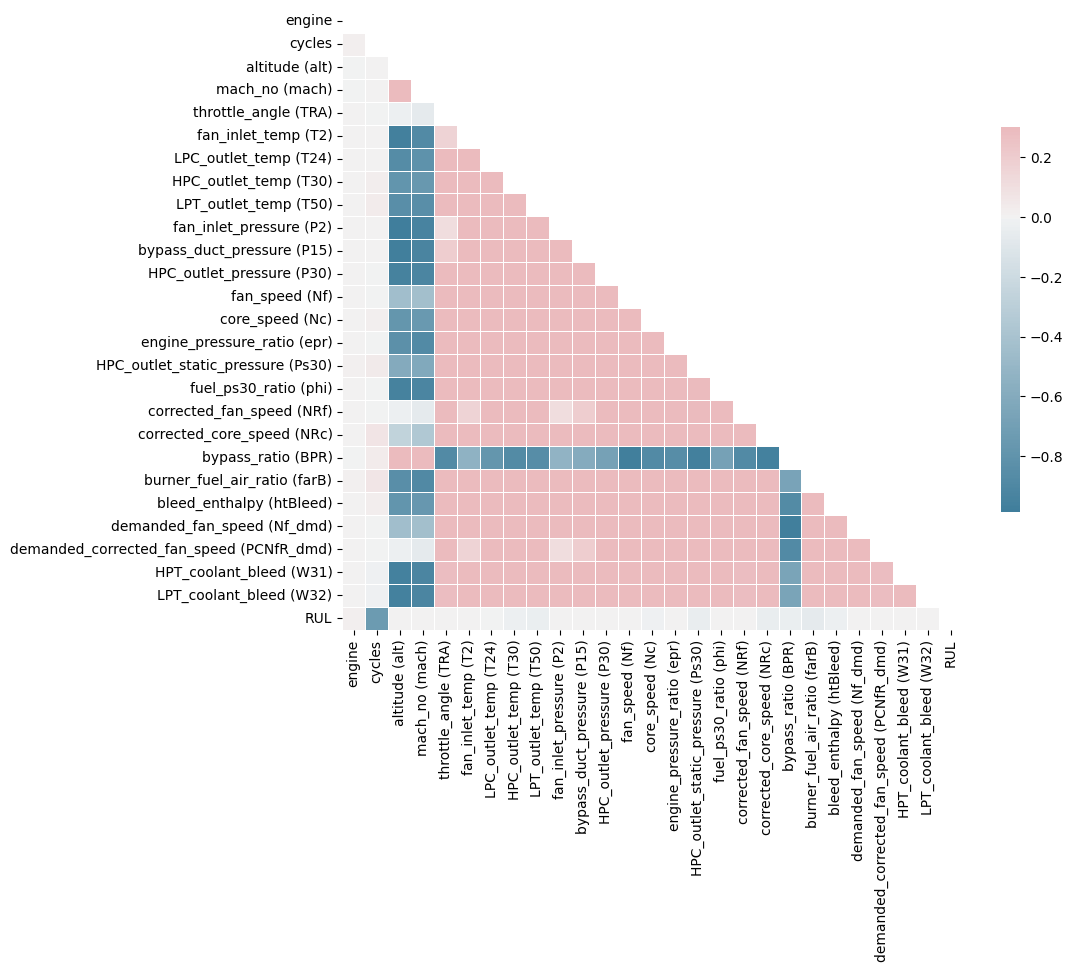

In [31]:
# Compute the correlation matrix
corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
train_data.columns

Index(['engine', 'cycles', 'altitude (alt)', 'mach_no (mach)',
       'throttle_angle (TRA)', 'fan_inlet_temp (T2)', 'LPC_outlet_temp (T24)',
       'HPC_outlet_temp (T30)', 'LPT_outlet_temp (T50)',
       'fan_inlet_pressure (P2)', 'bypass_duct_pressure (P15)',
       'HPC_outlet_pressure (P30)', 'fan_speed (Nf)', 'core_speed (Nc)',
       'engine_pressure_ratio (epr)', 'HPC_outlet_static_pressure (Ps30)',
       'fuel_ps30_ratio (phi)', 'corrected_fan_speed (NRf)',
       'corrected_core_speed (NRc)', 'bypass_ratio (BPR)',
       'burner_fuel_air_ratio (farB)', 'bleed_enthalpy (htBleed)',
       'demanded_fan_speed (Nf_dmd)',
       'demanded_corrected_fan_speed (PCNfR_dmd)', 'HPT_coolant_bleed (W31)',
       'LPT_coolant_bleed (W32)', 'RUL'],
      dtype='object')

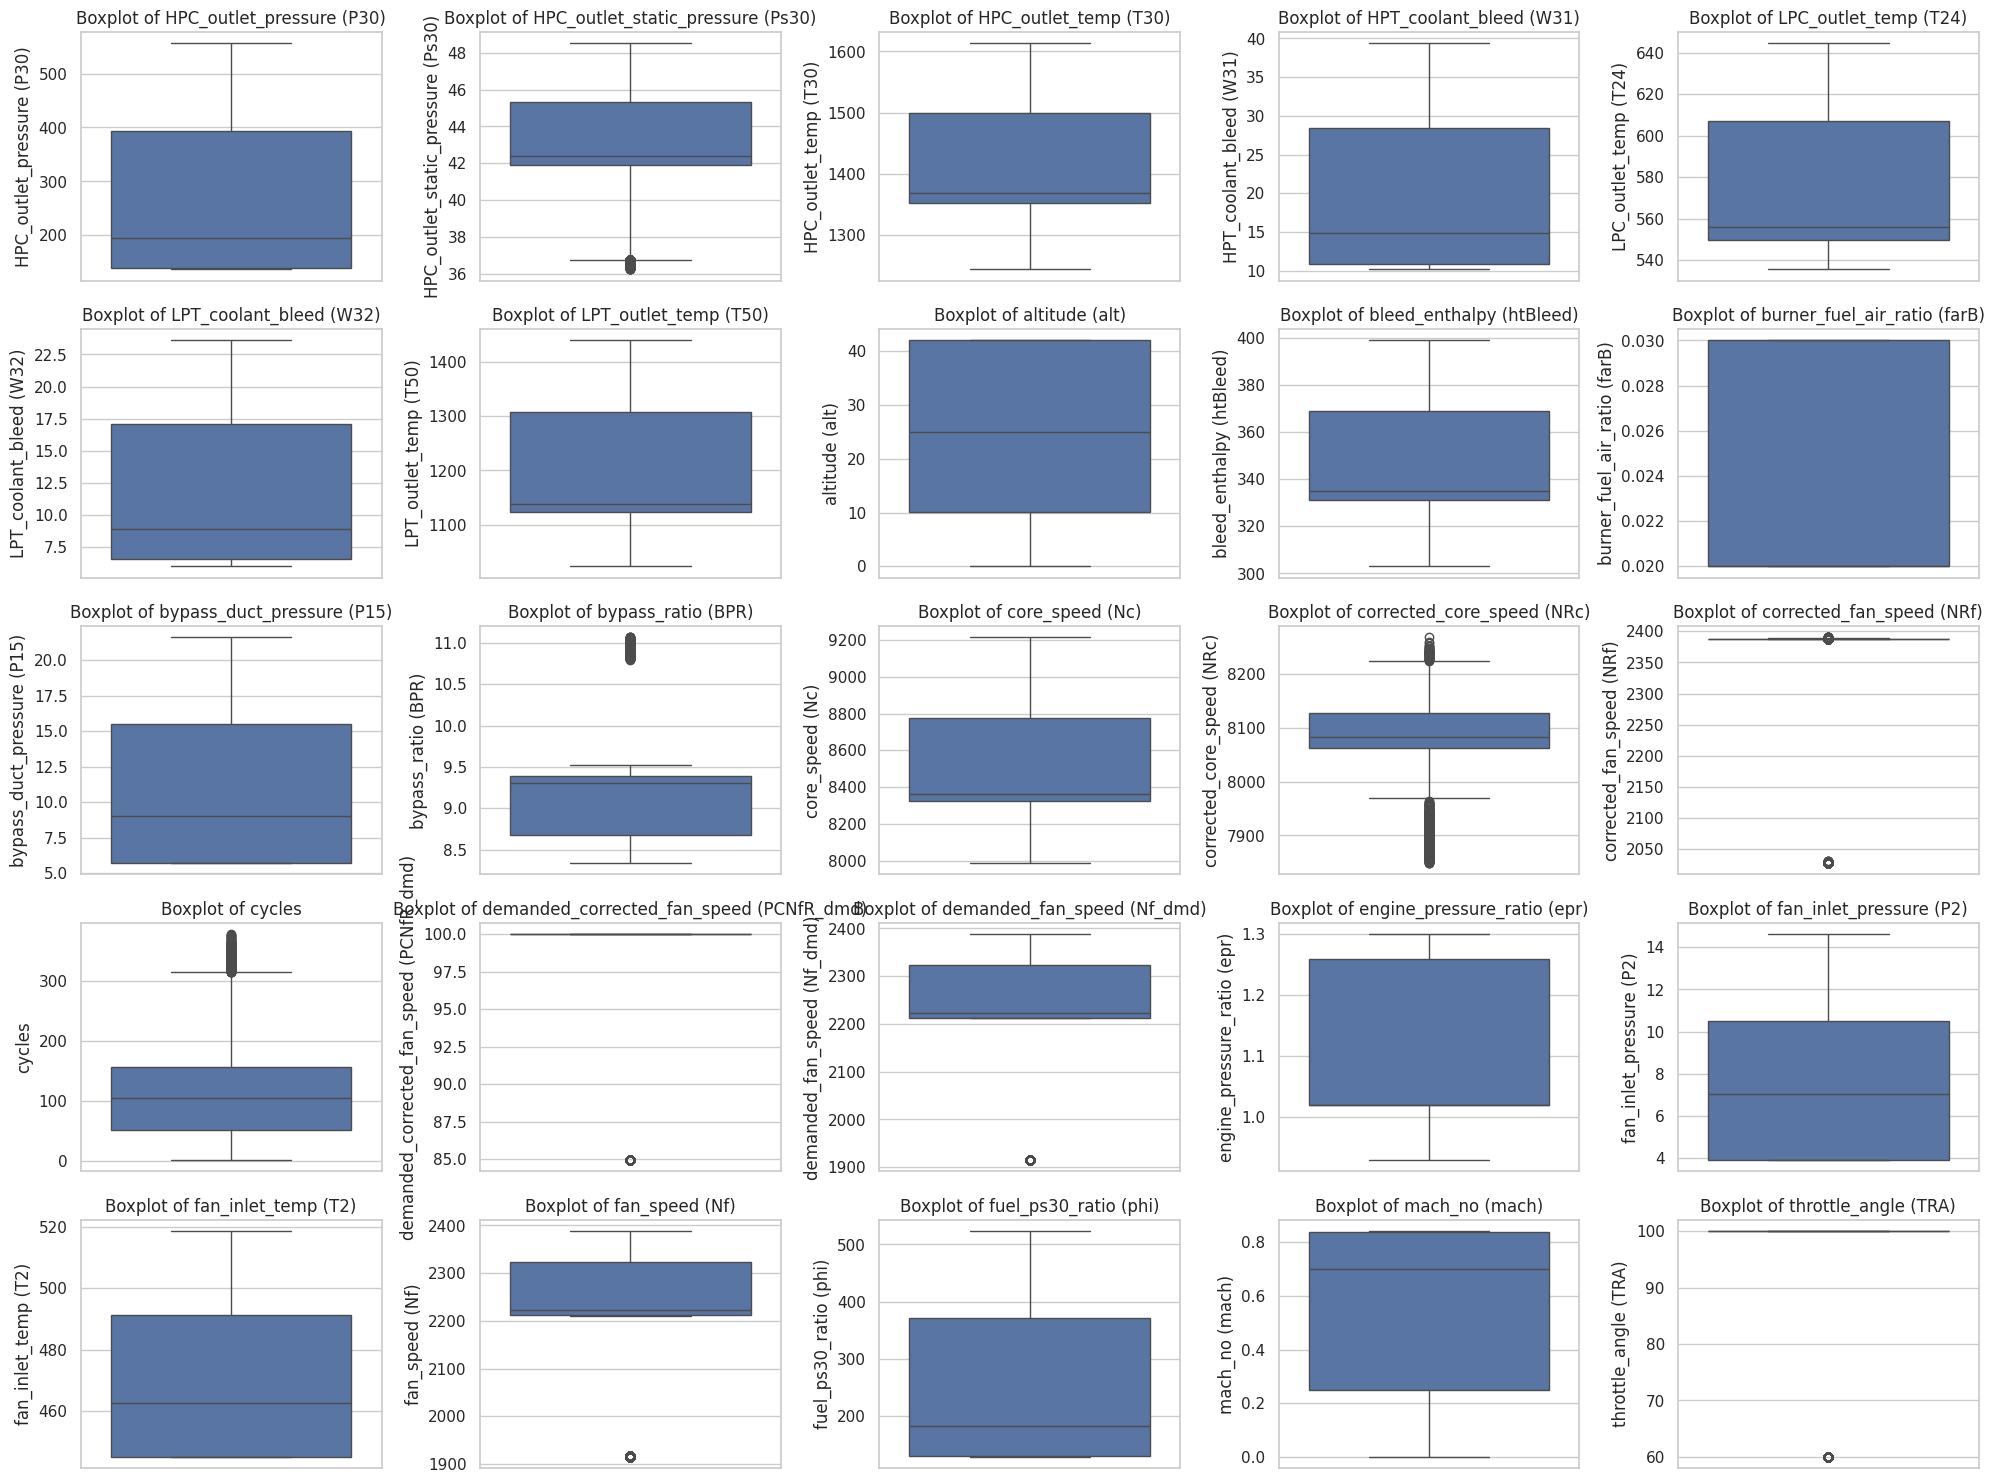

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style of the plots
sns.set(style="whitegrid")

# Plotting the boxplot for each feature
plt.figure(figsize=(20, 15))

# List of features to plot
features = train_data.columns.difference(['engine', 'RUL'])

# Create subplots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=feature, data=train_data)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

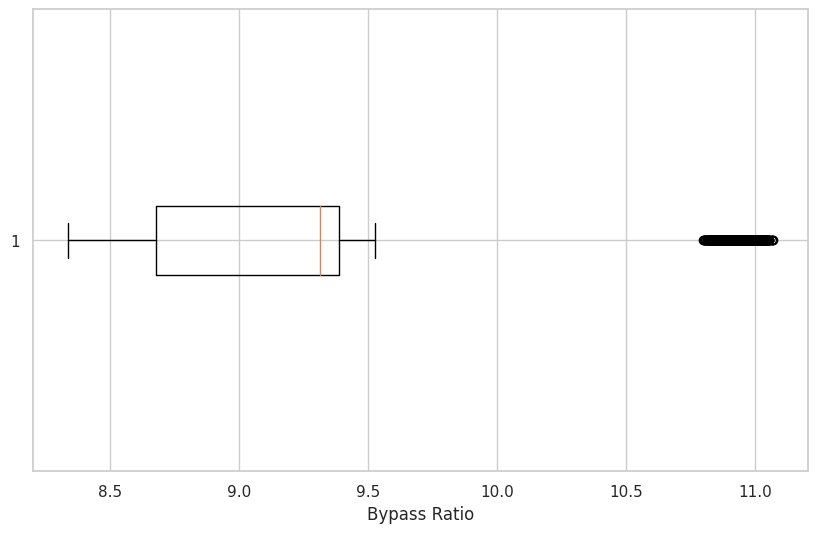

In [57]:
# Assuming 'train_data' is your DataFrame
plt.figure(figsize=(10, 6))
plt.boxplot(train_data['bypass_ratio (BPR)'].dropna(), vert=False)
plt.xlabel('Bypass Ratio')
plt.show()

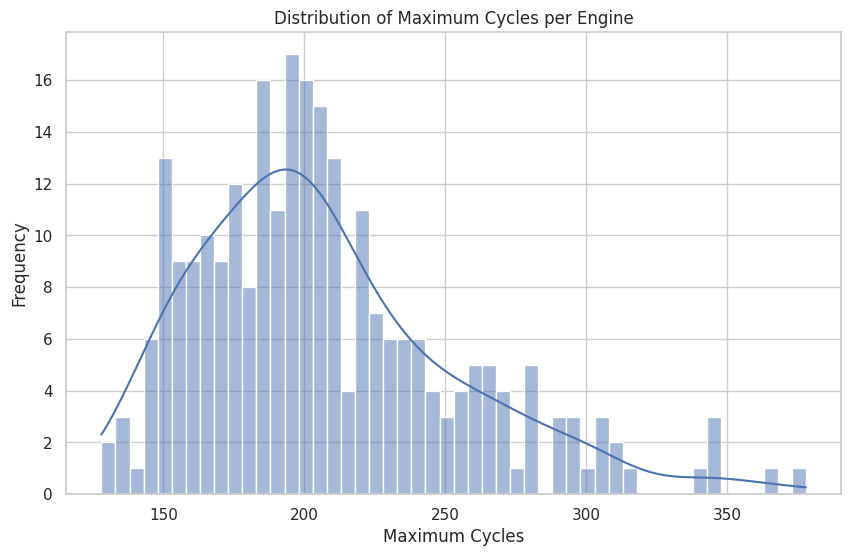

In [39]:
# Calculate the maximum cycles for each engine
max_cycles_per_engine = train_data.groupby('engine')['cycles'].max()

# Setting the style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of maximum cycles
plt.figure(figsize=(10, 6))
sns.histplot(max_cycles_per_engine, bins=50, kde=True)
plt.title('Distribution of Maximum Cycles per Engine')
plt.xlabel('Maximum Cycles')
plt.ylabel('Frequency')

plt.show()

In [45]:
print(train_data['altitude (alt)'].round().unique())
print(train_data['mach_no (mach)'].round(decimals=2).unique())
print(train_data['throttle_angle (TRA)'].unique())

[35. 25. 20. 42.  0. 10.]
[0.84 0.62 0.7  0.   0.25]
[100.  60.]


In [53]:
setting_names = ['altitude (alt)', 'mach_no (mach)', 'throttle_angle (TRA)']

# Check unique combinations
df = train_data[setting_names].copy()
df['altitude (alt)'] = df['altitude (alt)'].round()
df['mach_no (mach)'] = df['mach_no (mach)'].round(decimals=2)

# Group by the rounded columns and count the size of each group
unique_combinations = df.groupby(by=setting_names).size()

# Display the unique combinations
print(unique_combinations)


altitude (alt)  mach_no (mach)  throttle_angle (TRA)
0.0             0.00            100.0                    8044
10.0            0.25            100.0                    8096
20.0            0.70            100.0                    8122
25.0            0.62            60.0                     8002
35.0            0.84            100.0                    8037
42.0            0.84            100.0                   13458
dtype: int64


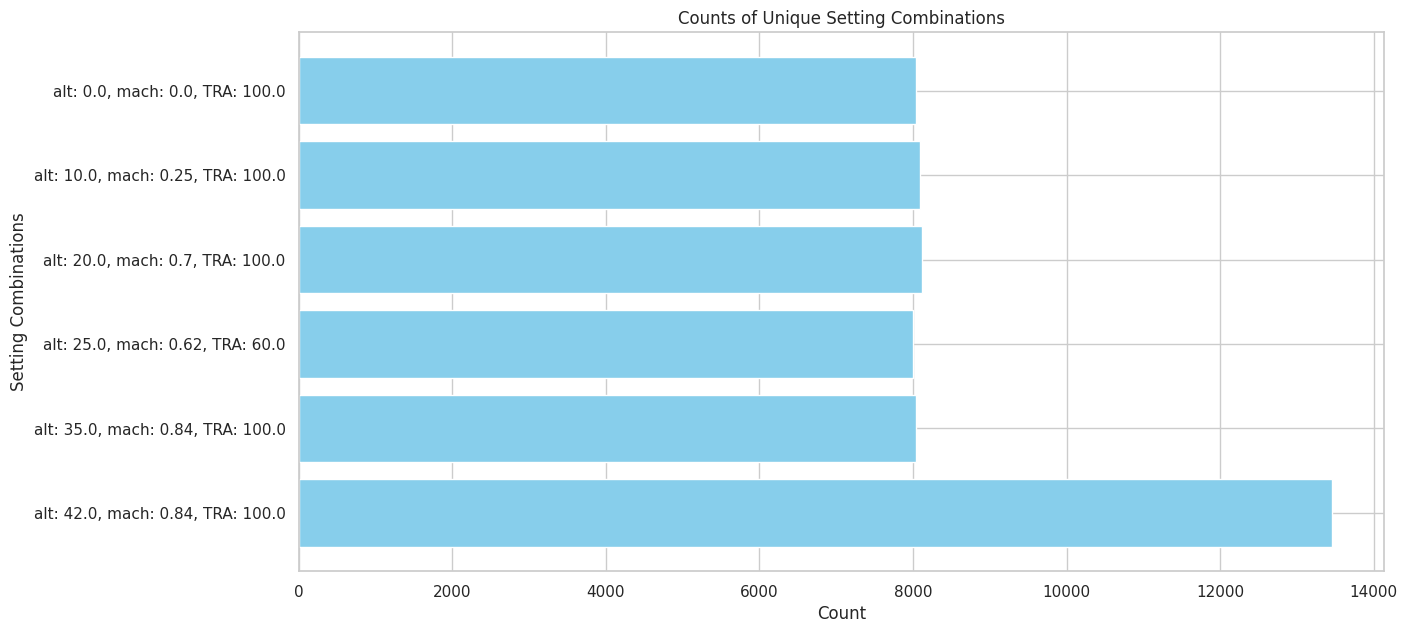

In [54]:
data = {
    'altitude (alt)': [0.0, 10.0, 20.0, 25.0, 35.0, 42.0],
    'mach_no (mach)': [0.00, 0.25, 0.70, 0.62, 0.84, 0.84],
    'throttle_angle (TRA)': [100.0, 100.0, 100.0, 60.0, 100.0, 100.0],
    'count': [8044, 8096, 8122, 8002, 8037, 13458]
}

# Creating a DataFrame from the data
df = pd.DataFrame(data)

# Combining the settings into a single string for each unique combination
df['combination'] = df.apply(lambda row: f"alt: {row['altitude (alt)']}, mach: {row['mach_no (mach)']}, TRA: {row['throttle_angle (TRA)']}", axis=1)

# Plotting the data
plt.figure(figsize=(14, 7))
plt.barh(df['combination'], df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Setting Combinations')
plt.title('Counts of Unique Setting Combinations')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()